# 70 Dog Breeds Neural Net

**NN**

In [141]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Rescaling
from keras.preprocessing.image import ImageDataGenerator

In [142]:
bSize = 64
lRate = 0.01
Epochs = 50

In [144]:
Classes = ['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless',
       'American Spaniel', 'Basenji', 'Basset', 'Beagle',
       'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim',
       'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi',
       'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier']

In [145]:
# reference for this ImageDataGenerator image labeling and feeding method:
# https://towardsdatascience.com/a-single-function-to-streamline-image-classification-with-keras-bd04f5cfe6df
# it is a built in function in Keras
train_Gen = ImageDataGenerator(rescale = 1. / 255)
train_genX = train_Gen.flow_from_directory(
    'train',
    target_size = (224, 224),
    batch_size = bSize,
    classes = Classes,
    class_mode = 'categorical'
)

Found 2212 images belonging to 20 classes.


In [146]:
test_Gen = ImageDataGenerator(rescale = 1. / 255)
test_genX = test_Gen.flow_from_directory(
    'test',
    target_size = (224, 224),
    batch_size = bSize,
    classes = Classes,
    class_mode = 'categorical'
)

Found 200 images belonging to 20 classes.


In [147]:
val_Gen = ImageDataGenerator(rescale = 1. / 255)
val_genX = val_Gen.flow_from_directory(
    'valid',
    target_size = (224, 224),
    batch_size = bSize,
    classes = Classes,
    class_mode = 'categorical'
)

Found 190 images belonging to 20 classes.


In [148]:
cnnModel = Sequential()

cnnModel.add(Rescaling((1. / 1), input_shape = (224, 224, 3)))



cnnModel.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((2, 2)))

cnnModel.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((2, 2)))

cnnModel.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))

cnnModel.add(MaxPooling2D((2, 2)))


cnnModel.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))

cnnModel.add(MaxPooling2D((3, 3)))


cnnModel.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))

cnnModel.add(MaxPooling2D((3, 3)))


cnnModel.add(Flatten())


cnnModel.add(Dense(512, activation='relu'))
cnnModel.add(Dense(256, activation='relu'))
cnnModel.add(Dense(128, activation='relu'))

cnnModel.add(Dense(len(Classes), activation='softmax'))

In [151]:
# optim = keras.optimizers.SGD(learning_rate = lRate)

#cnnModel.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])
cnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [155]:
history = cnnModel.fit(
    train_genX,
    validation_data = val_genX,
    batch_size = 64,
    epochs = Epochs
)

Epoch 1/50
35/35 [==============================] - 10s 263ms/step - loss: 5.6088e-06 - accuracy: 1.0000 - val_loss: 0.2586 - val_accuracy: 0.6579
Epoch 2/50
35/35 [==============================] - 9s 254ms/step - loss: 4.4636e-06 - accuracy: 1.0000 - val_loss: 0.2601 - val_accuracy: 0.6684
Epoch 3/50
35/35 [==============================] - 9s 254ms/step - loss: 3.4997e-06 - accuracy: 1.0000 - val_loss: 0.2650 - val_accuracy: 0.6789
Epoch 4/50
35/35 [==============================] - 9s 257ms/step - loss: 3.0271e-06 - accuracy: 1.0000 - val_loss: 0.2675 - val_accuracy: 0.6737
Epoch 5/50
35/35 [==============================] - 9s 259ms/step - loss: 2.6189e-06 - accuracy: 1.0000 - val_loss: 0.2724 - val_accuracy: 0.6842
Epoch 6/50
35/35 [==============================] - 9s 261ms/step - loss: 2.2896e-06 - accuracy: 1.0000 - val_loss: 0.2772 - val_accuracy: 0.6737
Epoch 7/50
35/35 [==============================] - 9s 262ms/step - loss: 2.0419e-06 - accuracy: 1.0000 - val_loss: 0.2783 

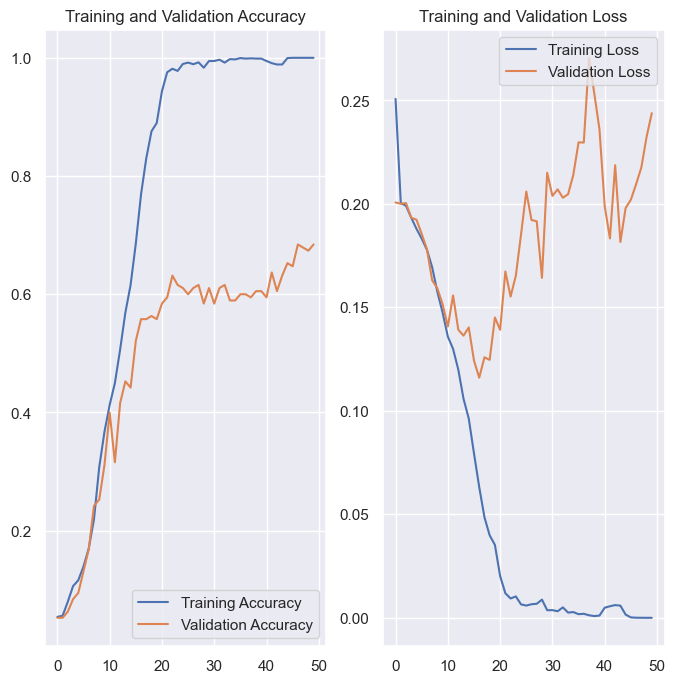

In [153]:
#https://www.tensorflow.org/tutorials/images/classification

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()